# Simple Moving Average (SMA) - Complete Trading Tutorial

## Overview
This notebook provides a comprehensive tutorial on the Simple Moving Average (SMA) indicator, including:
- Concept and theory
- Mathematical formula and calculation
- Manual implementation in Python
- TradingView integration
- Binance platform usage
- Practical trading strategies
- Backtesting examples

## 1. Introduction to Simple Moving Average (SMA)

### What is SMA?
The Simple Moving Average (SMA) is a technical analysis indicator that smooths out price data by creating a constantly updated average price over a specific period. It's one of the most widely used indicators in technical analysis.

### Why Use SMA?
- **Trend Identification**: SMA helps identify the direction of the trend
- **Support/Resistance**: SMA lines can act as dynamic support or resistance levels
- **Signal Generation**: Crossovers between different SMA periods generate trading signals
- **Noise Reduction**: Smooths out price volatility to show the underlying trend

### Best Timeframes and Markets
- **Short-term**: 5-20 period SMA for day trading
- **Medium-term**: 20-50 period SMA for swing trading
- **Long-term**: 100-200 period SMA for position trading
- **Markets**: Works well in trending markets, less effective in ranging markets

## 2. Mathematical Formula

### SMA Formula
```
SMA = (P₁ + P₂ + P₃ + ... + Pₙ) / n

Where:
- SMA = Simple Moving Average
- P₁, P₂, P₃, ... Pₙ = Closing prices for each period
- n = Number of periods
```

### Parameters
- **Period (n)**: Number of time periods to include in the calculation
  - Common values: 10, 20, 50, 100, 200
  - Shorter periods: More responsive to price changes
  - Longer periods: Smoother, less responsive to price changes

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import ccxt
from datetime import datetime, timedelta

# Import utilities - The package has been installed in development mode
# using 'pip install -e .' which makes the utils module directly importable
# This is cleaner than manual path manipulation and works across all notebooks
from utils.data_downloader import DataDownloader
from utils.indicators import IndicatorCalculator
from utils.backtest_engine import BacktestEngine, StrategyGenerator

# Set style for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

print("Libraries imported successfully!")

Libraries imported successfully!


## 3. Data Download

Let's download historical crypto data for our analysis.

In [4]:
# Initialize data downloader
downloader = DataDownloader()

# Download BTC/USDT data
pair = "BTC/USDT"
timeframe = "1d"
days = 365

print(f"Downloading {pair} data for {days} days...")
df = downloader.get_market_data(pair, timeframe, days, source='ccxt')

if df is not None:
    print(f"\nDownloaded {len(df)} candles of {pair} data")
    print(f"Date range: {df.index[0]} to {df.index[-1]}")
    print(f"\nFirst few rows:")
    display(df.head())
else:
    print("Failed to download data")

Downloaded 365 candles of BTC/USDT data from binance
Data saved to ../data/BTC_USDT_1d_365d.csv

Downloaded 365 candles of BTC/USDT data
Date range: 2024-08-07 00:00:00 to 2025-08-06 00:00:00

First few rows:
Downloaded 365 candles of BTC/USDT data from binance
Data saved to ../data/BTC_USDT_1d_365d.csv

Downloaded 365 candles of BTC/USDT data
Date range: 2024-08-07 00:00:00 to 2025-08-06 00:00:00

First few rows:


,open,high,low,close,volume,typical_price,median_price,weighted_close
timestamp,,,,,,,,
2024-08-07,55991.3,57699.0,54519.8,55102.9,377442.540,55773.900000,56109.40,55606.150
2024-08-08,55102.9,62737.2,54672.4,61659.8,470117.508,59689.800000,58704.80,60182.300
2024-08-09,61659.8,61726.0,59500.0,60808.6,308674.339,60678.200000,60613.00,60710.800
2024-08-10,60808.6,61450.0,60208.5,60889.9,115593.354,60849.466667,60829.25,60859.575
2024-08-11,60889.8,62000.0,58255.4,58693.1,202539.076,59649.500000,60127.70,59410.400


## 4. Manual Calculation of SMA

Let's implement SMA from scratch to understand how it works.

In [5]:
def calculate_sma_manual(data, period):
    """
    Calculate Simple Moving Average manually
    
    Parameters:
    - data: pandas Series with price data
    - period: Number of periods for SMA calculation
    
    Returns:
    - pandas Series with SMA values
    """
    sma = data.rolling(window=period).mean()
    return sma

# Calculate SMA with different periods
df_manual = df.copy()
df_manual['sma_10'] = calculate_sma_manual(df_manual['close'], 10)
df_manual['sma_20'] = calculate_sma_manual(df_manual['close'], 20)
df_manual['sma_50'] = calculate_sma_manual(df_manual['close'], 50)

print("SMA calculated manually:")
display(df_manual[['close', 'sma_10', 'sma_20', 'sma_50']].tail(10))

# Let's verify the calculation manually
print("\nManual verification of SMA(10) for the last row:")
last_10_prices = df_manual['close'].iloc[-10:]
manual_sma_10 = last_10_prices.mean()
calculated_sma_10 = df_manual['sma_10'].iloc[-1]
print(f"Sum of last 10 prices: {last_10_prices.sum():.2f}")
print(f"Manual SMA(10): {manual_sma_10:.2f}")
print(f"Calculated SMA(10): {calculated_sma_10:.2f}")
print(f"Difference: {abs(manual_sma_10 - calculated_sma_10):.6f}")

SMA calculated manually:


,close,sma_10,sma_20,sma_50
timestamp,,,,
2025-07-28,118041.4,118229.96,117831.250,111132.226
2025-07-29,117897.0,118238.22,118166.105,111285.608
2025-07-30,117771.0,118293.72,118255.695,111436.320
2025-07-31,115697.3,118130.43,118165.560,111578.266
2025-08-01,113244.8,117455.54,117958.335,111730.972
2025-08-02,112508.8,116835.07,117631.860,111860.602
2025-08-03,114150.8,116420.72,117348.575,112036.420
2025-08-04,115002.1,116162.58,117211.755,112225.770
2025-08-05,114069.6,115780.62,116985.700,112372.160



Manual verification of SMA(10) for the last row:
Sum of last 10 prices: 1153452.00
Manual SMA(10): 115345.20
Calculated SMA(10): 115345.20
Difference: 0.000000


## 5. Library Implementation

Now let's use established libraries to calculate SMA.

In [6]:
# Using pandas (built-in)
df_pandas = df.copy()
df_pandas['sma_20_pandas'] = df_pandas['close'].rolling(window=20).mean()

# Using our utilities
df_utils = df.copy()
df_utils['sma_20_utils'] = IndicatorCalculator.sma(df_utils['close'], 20)

# Using pandas-ta
import pandas_ta as ta
df_ta = df.copy()
df_ta.ta.sma(length=20, append=True)

# Using TA-Lib
try:
    import talib
    df_talib = df.copy()
    df_talib['sma_20_talib'] = talib.SMA(df_talib['close'].values, timeperiod=20)
    print("TA-Lib SMA calculated successfully")
except ImportError:
    print("TA-Lib not installed, skipping TA-Lib example")
    df_talib = df.copy()
    df_talib['sma_20_talib'] = np.nan

# Compare results
print("Comparison of different SMA implementations:")
comparison = pd.DataFrame({
    'Manual': df_manual['sma_20'],
    'Pandas': df_pandas['sma_20_pandas'],
    'Utils': df_utils['sma_20_utils'],
    'Pandas-TA': df_ta['SMA_20'],
    'TA-Lib': df_talib['sma_20_talib']
})

display(comparison.dropna().tail(10))

# Check if all methods produce the same results
print("\nDifferences between methods:")
print(f"Manual vs Pandas max difference: {abs(comparison['Manual'] - comparison['Pandas']).max():.8f}")
print(f"Manual vs Utils max difference: {abs(comparison['Manual'] - comparison['Utils']).max():.8f}")
print(f"Manual vs Pandas-TA max difference: {abs(comparison['Manual'] - comparison['Pandas-TA']).max():.8f}")

TA-Lib SMA calculated successfully
Comparison of different SMA implementations:


,Manual,Pandas,Utils,Pandas-TA,TA-Lib
timestamp,,,,,
2025-07-28,117831.250,117831.250,117831.250,117831.250,117831.250
2025-07-29,118166.105,118166.105,118166.105,118166.105,118166.105
2025-07-30,118255.695,118255.695,118255.695,118255.695,118255.695
2025-07-31,118165.560,118165.560,118165.560,118165.560,118165.560
2025-08-01,117958.335,117958.335,117958.335,117958.335,117958.335
2025-08-02,117631.860,117631.860,117631.860,117631.860,117631.860
2025-08-03,117348.575,117348.575,117348.575,117348.575,117348.575
2025-08-04,117211.755,117211.755,117211.755,117211.755,117211.755
2025-08-05,116985.700,116985.700,116985.700,116985.700,116985.700



Differences between methods:
Manual vs Pandas max difference: 0.00000000
Manual vs Utils max difference: 0.00000000
Manual vs Pandas-TA max difference: 0.00000000


## 6. Visualization

Let's visualize SMA with price action.

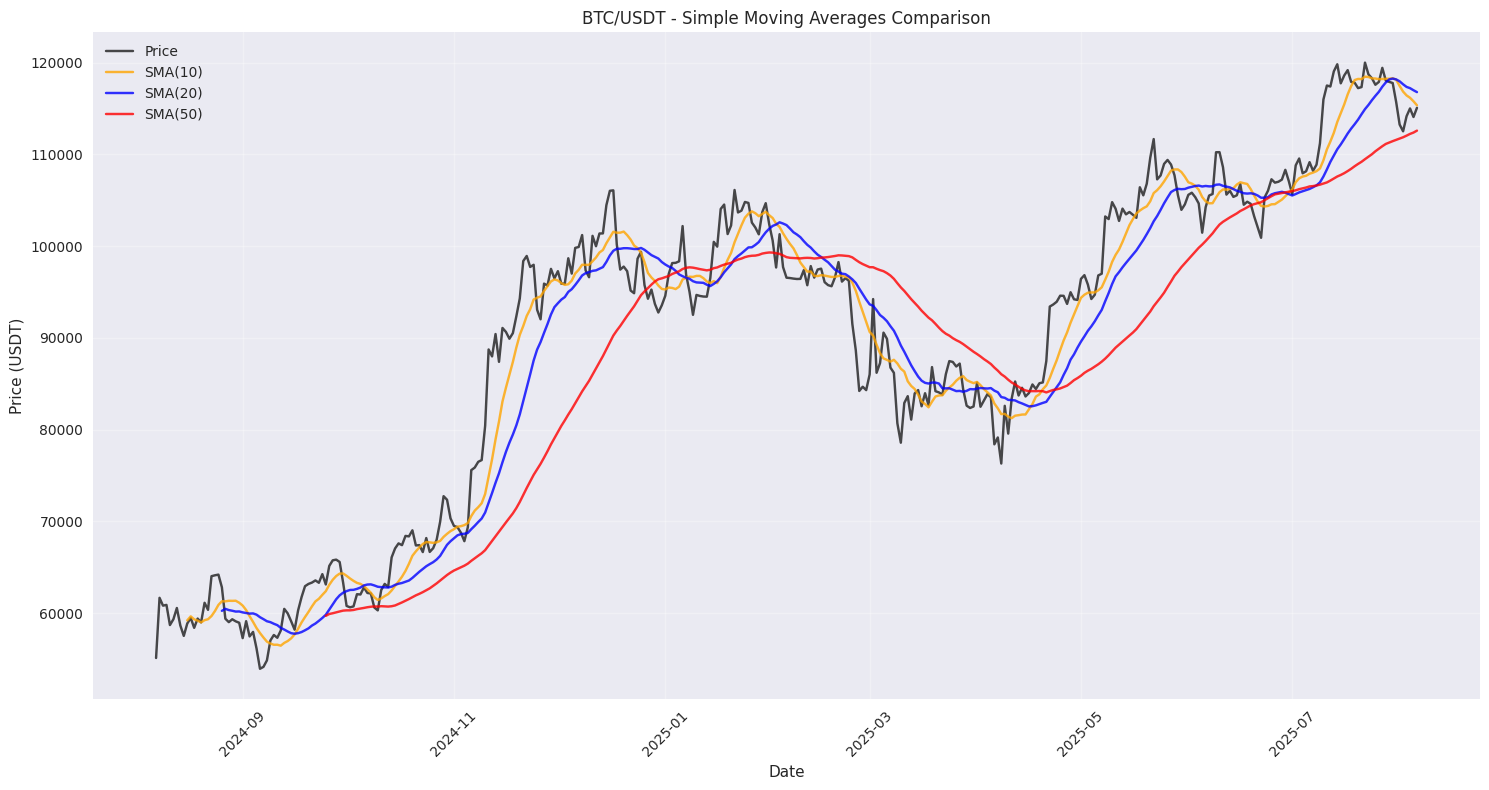

In [7]:
# Create interactive plot
fig = make_subplots(
    rows=1, cols=1,
    subplot_titles=(f'{pair} - Simple Moving Averages',),
    vertical_spacing=0.1
)

# Price chart
fig.add_trace(
    go.Candlestick(
        x=df_manual.index,
        open=df_manual['open'],
        high=df_manual['high'],
        low=df_manual['low'],
        close=df_manual['close'],
        name='Price'
    ),
    row=1, col=1
)

# SMA lines
fig.add_trace(
    go.Scatter(
        x=df_manual.index,
        y=df_manual['sma_10'],
        mode='lines',
        name='SMA(10)',
        line=dict(color='orange', width=2)
    ),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(
        x=df_manual.index,
        y=df_manual['sma_20'],
        mode='lines',
        name='SMA(20)',
        line=dict(color='blue', width=2)
    ),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(
        x=df_manual.index,
        y=df_manual['sma_50'],
        mode='lines',
        name='SMA(50)',
        line=dict(color='red', width=2)
    ),
    row=1, col=1
)

fig.update_layout(
    title=f'{pair} - Simple Moving Averages',
    template='plotly_dark',
    height=600,
    xaxis_rangeslider_visible=False
)

fig.show()

# Create static plot showing SMA characteristics
plt.figure(figsize=(15, 8))
plt.plot(df_manual.index, df_manual['close'], label='Price', alpha=0.7, color='black')
plt.plot(df_manual.index, df_manual['sma_10'], label='SMA(10)', alpha=0.8, color='orange')
plt.plot(df_manual.index, df_manual['sma_20'], label='SMA(20)', alpha=0.8, color='blue')
plt.plot(df_manual.index, df_manual['sma_50'], label='SMA(50)', alpha=0.8, color='red')

plt.title(f'{pair} - Simple Moving Averages Comparison')
plt.xlabel('Date')
plt.ylabel('Price (USDT)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 7. TradingView Integration

### Pine Script for SMA

```pine
// Simple Moving Average (SMA) Pine Script
//@version=5
indicator("Simple Moving Average", shorttitle="SMA", overlay=true)

// Input parameters
length = input.int(20, "Length", minval=1)
src = input.source(close, "Source")

// Calculate SMA
smaValue = ta.sma(src, length)

// Plot
plot(smaValue, "SMA", color=color.blue, linewidth=2)

// Optional: Add multiple SMAs
sma10 = ta.sma(src, 10)
sma50 = ta.sma(src, 50)
plot(sma10, "SMA(10)", color=color.orange, linewidth=1)
plot(sma50, "SMA(50)", color=color.red, linewidth=1)

// Optional: Add crossover signals
buySignal = ta.crossover(sma10, sma50)
sellSignal = ta.crossunder(sma10, sma50)

plotshape(buySignal, title="Buy Signal", location=location.belowbar, color=color.green, style=shape.triangleup, size=size.small)
plotshape(sellSignal, title="Sell Signal", location=location.abovebar, color=color.red, style=shape.triangledown, size=size.small)
```

### How to Add to TradingView:
1. Open TradingView chart
2. Click on "Pine Editor" tab at the bottom
3. Copy and paste the script above
4. Click "Add to Chart"
5. Adjust parameters in the settings

### TradingView Built-in SMA:
1. Click on "Indicators" at the top
2. Search for "Moving Average"
3. Select "Simple Moving Average (SMA)"
4. Adjust length and other parameters

## 8. Binance Integration

### How to Add SMA on Binance:
1. Open Binance trading interface
2. Select your trading pair (e.g., BTC/USDT)
3. Click on "Indicators" at the top of the chart
4. Search for "Moving Average"
5. Select "MA" from the list
6. In the settings:
   - Set "MA" to "SMA" (Simple Moving Average)
   - Adjust the length (period)
   - Choose color and line style
7. Click "Apply"

### Binance SMA Parameters:
- **Length**: 1-500 (common values: 10, 20, 50, 100, 200)
- **Source**: Close, Open, High, Low, HL/2, HLC/3, OHLC/4
- **Offset**: 0-500 (displaces the MA forward/backward)
- **Color**: Custom color selection
- **Line Style**: Solid, Dashed, Dotted
- **Line Width**: 1-5 pixels

## 9. Trading Strategies

### Strategy 1: SMA Crossover
**Description**: Buy when short-term SMA crosses above long-term SMA, sell when it crosses below

**Rules**:
- **Entry**: Short SMA (e.g., 20) crosses above Long SMA (e.g., 50)
- **Exit**: Short SMA crosses below Long SMA
- **Stop Loss**: 2-3% below entry price
- **Take Profit**: 5-10% above entry price or when opposite signal occurs

In [8]:
def sma_crossover_strategy(data, short_period=20, long_period=50):
    """
    SMA Crossover Strategy
    """
    df = data.copy()
    
    # Calculate SMAs
    df['sma_short'] = IndicatorCalculator.sma(df['close'], short_period)
    df['sma_long'] = IndicatorCalculator.sma(df['close'], long_period)
    
    # Generate signals
    df['signal'] = 0
    df.loc[df['sma_short'] > df['sma_long'], 'signal'] = 1  # Long position
    df.loc[df['sma_short'] < df['sma_long'], 'signal'] = -1  # Short position
    
    # Identify crossovers
    df['crossover'] = ((df['sma_short'] > df['sma_long']) & 
                       (df['sma_short'].shift(1) <= df['sma_long'].shift(1)))
    df['crossunder'] = ((df['sma_short'] < df['sma_long']) & 
                        (df['sma_short'].shift(1) >= df['sma_long'].shift(1)))
    
    return df

# Apply strategy
df_signals = sma_crossover_strategy(df_manual)

# Plot signals
fig = make_subplots(
    rows=1, cols=1,
    subplot_titles=(f'{pair} - SMA Crossover Strategy',),
    vertical_spacing=0.1
)

# Price chart
fig.add_trace(
    go.Candlestick(
        x=df_signals.index,
        open=df_signals['open'],
        high=df_signals['high'],
        low=df_signals['low'],
        close=df_signals['close'],
        name='Price'
    ),
    row=1, col=1
)

# SMA lines
fig.add_trace(
    go.Scatter(
        x=df_signals.index,
        y=df_signals['sma_short'],
        mode='lines',
        name=f'SMA({20})',
        line=dict(color='orange', width=2)
    ),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(
        x=df_signals.index,
        y=df_signals['sma_long'],
        mode='lines',
        name=f'SMA({50})',
        line=dict(color='red', width=2)
    ),
    row=1, col=1
)

# Buy signals
buy_signals = df_signals[df_signals['crossover']]
fig.add_trace(
    go.Scatter(
        x=buy_signals.index,
        y=buy_signals['close'],
        mode='markers',
        marker=dict(symbol='triangle-up', size=12, color='green'),
        name='Buy Signal'
    ),
    row=1, col=1
)

# Sell signals
sell_signals = df_signals[df_signals['crossunder']]
fig.add_trace(
    go.Scatter(
        x=sell_signals.index,
        y=sell_signals['close'],
        mode='markers',
        marker=dict(symbol='triangle-down', size=12, color='red'),
        name='Sell Signal'
    ),
    row=1, col=1
)

fig.update_layout(
    title=f'{pair} - SMA Crossover Strategy',
    template='plotly_dark',
    height=600
)

fig.show()

print(f"Total buy signals: {len(buy_signals)}")
print(f"Total sell signals: {len(sell_signals)}")
print(f"\nRecent signals:")
recent_signals = df_signals[df_signals['crossover'] | df_signals['crossunder']].tail(10)
display(recent_signals[['close', 'sma_short', 'sma_long', 'crossover', 'crossunder']])

Total buy signals: 3
Total sell signals: 3

Recent signals:


,close,sma_short,sma_long,crossover,crossunder
timestamp,,,,,
2025-01-05,98340.2,96911.125,97256.636,False,True
2025-01-21,106114.5,98581.160,98379.822,True,False
2025-02-16,96067.0,98510.100,98760.696,False,True
2025-04-24,93931.6,84596.045,84386.696,True,False
2025-06-29,108309.8,105818.815,105867.726,False,True
2025-07-08,108873.1,106615.040,106605.416,True,False


### Strategy 2: Price vs SMA
**Description**: Buy when price crosses above SMA, sell when price crosses below SMA

**Rules**:
- **Entry**: Price closes above SMA
- **Exit**: Price closes below SMA
- **Stop Loss**: 1-2% below SMA
- **Take Profit**: 3-5% above entry price

In [9]:
def price_vs_sma_strategy(data, sma_period=20):
    """
    Price vs SMA Strategy
    """
    df = data.copy()
    
    # Calculate SMA
    df['sma'] = IndicatorCalculator.sma(df['close'], sma_period)
    
    # Generate signals
    df['signal'] = 0
    df.loc[df['close'] > df['sma'], 'signal'] = 1  # Long position
    df.loc[df['close'] < df['sma'], 'signal'] = -1  # Short position
    
    # Identify crossovers
    df['price_above_sma'] = (df['close'] > df['sma']) & (df['close'].shift(1) <= df['sma'].shift(1))
    df['price_below_sma'] = (df['close'] < df['sma']) & (df['close'].shift(1) >= df['sma'].shift(1))
    
    return df

# Apply strategy
df_price_sma = price_vs_sma_strategy(df_manual)

# Create signals DataFrame for backtesting
price_sma_signals = pd.DataFrame(index=df_price_sma.index)
price_sma_signals['signal'] = df_price_sma['signal']

print(f"Price above SMA signals: {df_price_sma['price_above_sma'].sum()}")
print(f"Price below SMA signals: {df_price_sma['price_below_sma'].sum()}")

Price above SMA signals: 15
Price below SMA signals: 16


### Strategy 3: Triple SMA
**Description**: Uses three SMAs to identify strong trends and reduce false signals

**Rules**:
- **Strong Buy**: SMA(10) > SMA(20) > SMA(50)
- **Strong Sell**: SMA(10) < SMA(20) < SMA(50)
- **Entry**: When alignment occurs
- **Exit**: When alignment breaks

Strong uptrend signals: 6
Strong downtrend signals: 5


/tmp/ipykernel_13132/869131438.py:25: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

/tmp/ipykernel_13132/869131438.py:26: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



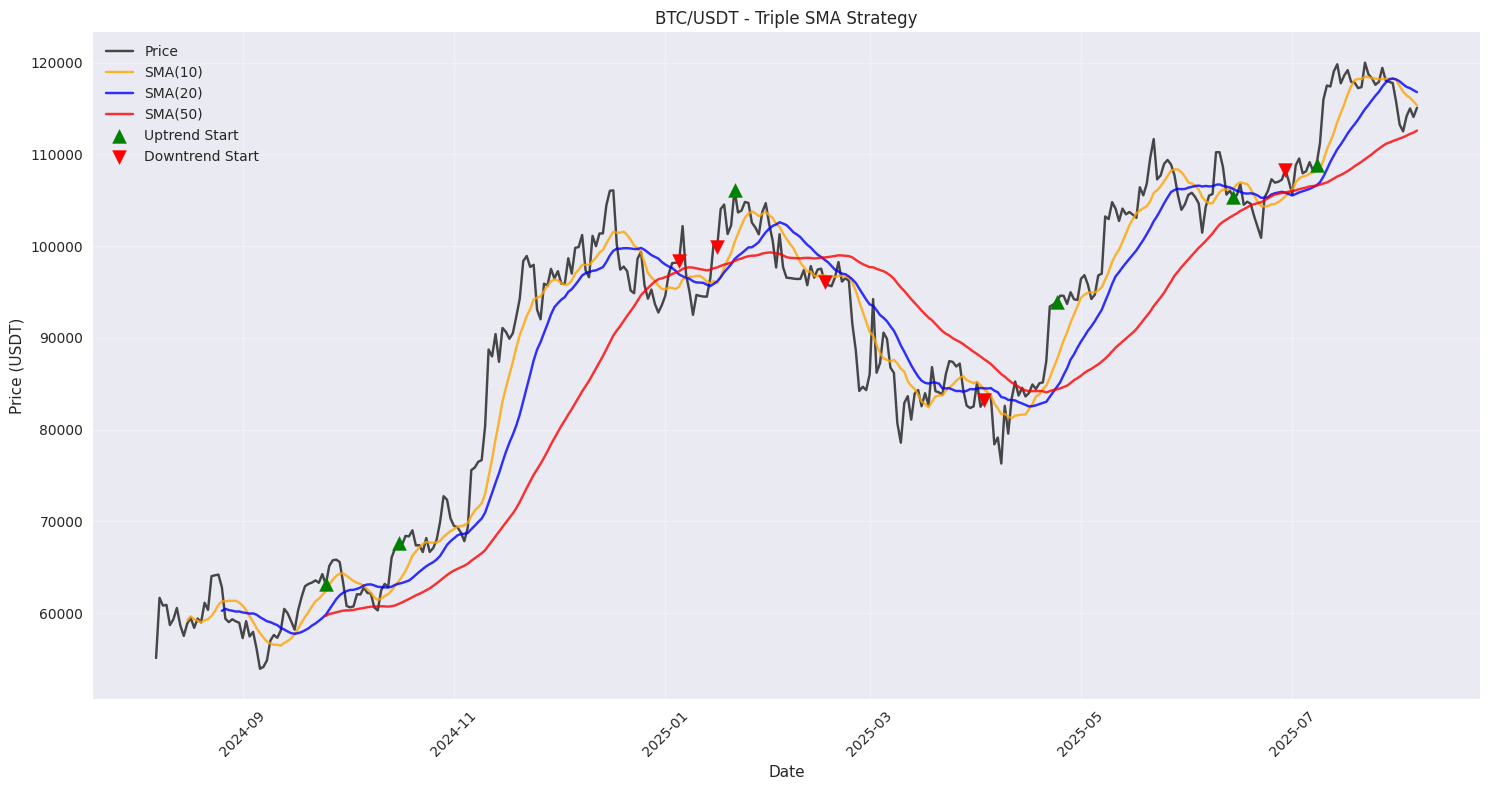

In [10]:
def triple_sma_strategy(data, short=10, medium=20, long=50):
    """
    Triple SMA Strategy
    """
    df = data.copy()
    
    # Calculate SMAs
    df['sma_short'] = IndicatorCalculator.sma(df['close'], short)
    df['sma_medium'] = IndicatorCalculator.sma(df['close'], medium)
    df['sma_long'] = IndicatorCalculator.sma(df['close'], long)
    
    # Generate signals
    df['signal'] = 0
    
    # Strong uptrend: all SMAs aligned upwards
    strong_uptrend = (df['sma_short'] > df['sma_medium']) & (df['sma_medium'] > df['sma_long'])
    
    # Strong downtrend: all SMAs aligned downwards
    strong_downtrend = (df['sma_short'] < df['sma_medium']) & (df['sma_medium'] < df['sma_long'])
    
    df.loc[strong_uptrend, 'signal'] = 1
    df.loc[strong_downtrend, 'signal'] = -1
    
    # Identify trend changes
    df['uptrend_start'] = strong_uptrend & ~strong_uptrend.shift(1).fillna(False)
    df['downtrend_start'] = strong_downtrend & ~strong_downtrend.shift(1).fillna(False)
    
    return df

# Apply strategy
df_triple_sma = triple_sma_strategy(df_manual)

# Create signals DataFrame for backtesting
triple_sma_signals = pd.DataFrame(index=df_triple_sma.index)
triple_sma_signals['signal'] = df_triple_sma['signal']

print(f"Strong uptrend signals: {df_triple_sma['uptrend_start'].sum()}")
print(f"Strong downtrend signals: {df_triple_sma['downtrend_start'].sum()}")

# Plot triple SMA
plt.figure(figsize=(15, 8))
plt.plot(df_triple_sma.index, df_triple_sma['close'], label='Price', alpha=0.7, color='black')
plt.plot(df_triple_sma.index, df_triple_sma['sma_short'], label='SMA(10)', alpha=0.8, color='orange')
plt.plot(df_triple_sma.index, df_triple_sma['sma_medium'], label='SMA(20)', alpha=0.8, color='blue')
plt.plot(df_triple_sma.index, df_triple_sma['sma_long'], label='SMA(50)', alpha=0.8, color='red')

# Highlight trend periods
uptrend_periods = df_triple_sma[df_triple_sma['uptrend_start']]
downtrend_periods = df_triple_sma[df_triple_sma['downtrend_start']]

plt.scatter(uptrend_periods.index, uptrend_periods['close'], 
           color='green', s=100, marker='^', label='Uptrend Start', zorder=5)
plt.scatter(downtrend_periods.index, downtrend_periods['close'], 
           color='red', s=100, marker='v', label='Downtrend Start', zorder=5)

plt.title(f'{pair} - Triple SMA Strategy')
plt.xlabel('Date')
plt.ylabel('Price (USDT)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 10. Backtesting Results

Let's backtest our strategies and analyze the results.

Backtesting SMA_Crossover strategy...
Backtesting Price_vs_SMA strategy...
Backtesting Triple_SMA strategy...

Strategy Comparison:


,total_return,annualized_return,volatility,sharpe_ratio,max_drawdown,win_rate,profit_factor,total_trades
strategy,,,,,,,,
SMA_Crossover,0.493459,0.495106,0.424588,1.118981,-0.267620,0.517460,1.205327,315
Price_vs_SMA,0.104676,0.104978,0.443031,0.191810,-0.360530,0.527536,1.070382,345
Triple_SMA,0.641457,0.643694,0.380022,1.641204,-0.148093,0.525114,1.336868,219


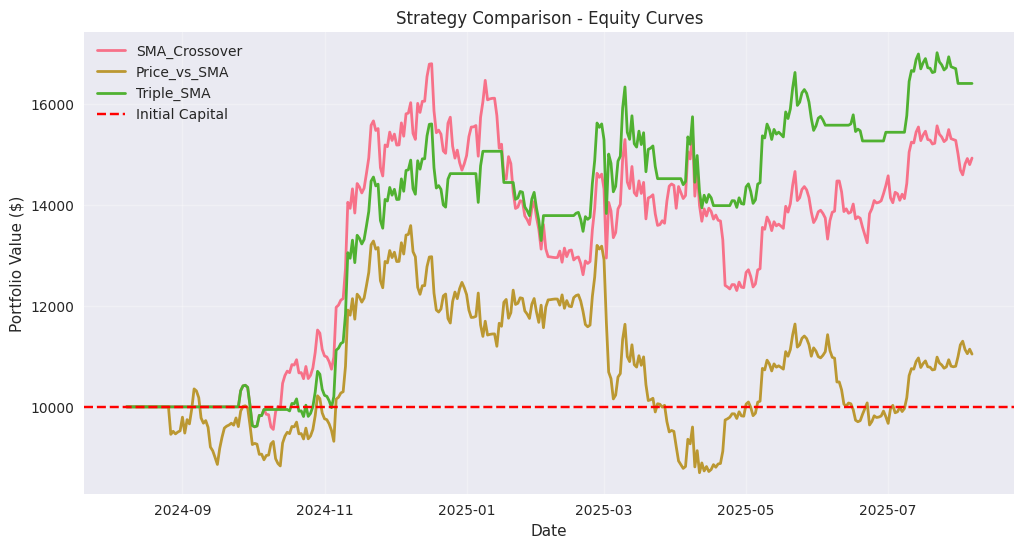

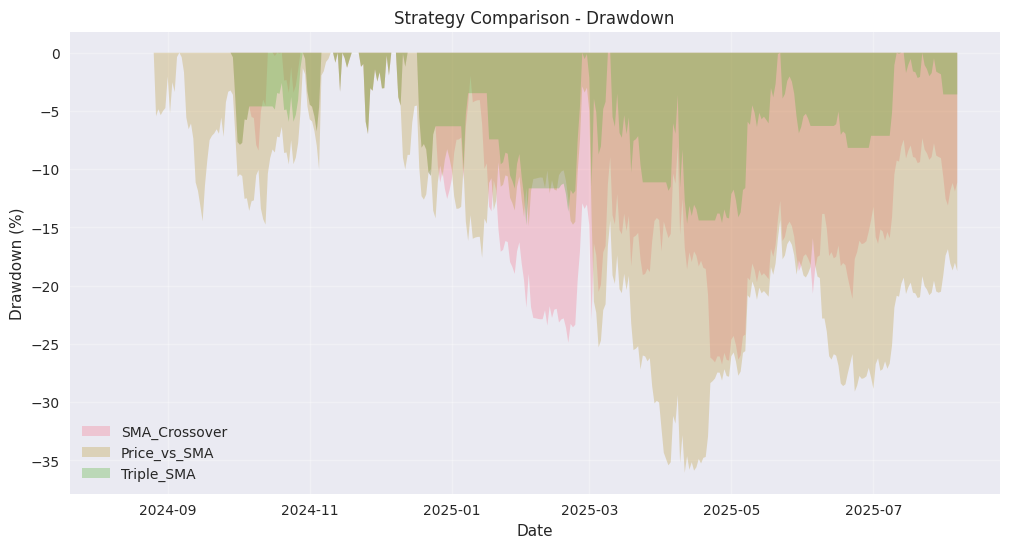

In [11]:
# Initialize backtest engine
engine = BacktestEngine(initial_capital=10000)

# Create signals for each strategy
strategies = {
    'SMA_Crossover': df_signals[['signal']],
    'Price_vs_SMA': price_sma_signals,
    'Triple_SMA': triple_sma_signals
}

# Run backtests
for name, signals in strategies.items():
    print(f"Backtesting {name} strategy...")
    engine.run_backtest(df_manual, signals, name)

# Compare strategies
comparison = engine.compare_strategies(list(strategies.keys()))
print("\nStrategy Comparison:")
display(comparison)

# Plot equity curves
engine.plot_equity_curve()

# Plot drawdowns
engine.plot_drawdown()

In [12]:
# Generate detailed report for the best strategy
best_strategy = comparison['total_return'].idxmax()
print(f"Best performing strategy: {best_strategy}")
print(engine.generate_report(best_strategy))

Best performing strategy: Triple_SMA

BACKTEST REPORT: Triple_SMA

PERFORMANCE METRICS:
- Total Return: 64.15%
- Annualized Return: 64.37%
- Volatility: 38.00%
- Sharpe Ratio: 1.64
- Maximum Drawdown: -14.81%
- Win Rate: 52.51%
- Profit Factor: 1.34
- Total Trades: 219

RISK METRICS:
- Calmar Ratio: 4.35
- Sortino Ratio: 1.71
- Win/Loss Ratio: 1.21

TRADE ANALYSIS:
- Average Win: 1.96%
- Average Loss: -1.62%
- Largest Win: 10.35%
- Largest Loss: -9.55%

RECOMMENDATIONS:
- Low profit factor: Consider improving risk-reward ratio




Trade Analysis for Triple_SMA:
Total trades: 5
Winning trades: 3
Losing trades: 2
Win rate: 60.0%
Average profit per trade: 12.20%
Average hold period: 54.6 days
Largest win: 55.80%
Largest loss: -7.33%

Recent Trades:


,entry_date,exit_date,entry_price,exit_price,position,profit,profit_pct,hold_days
0,2024-09-25,2025-01-05,63118.4,98340.2,Long,35221.8,55.802745,102
1,2025-01-06,2025-01-21,102180.4,106114.5,Short,-3934.1,-3.850151,15
2,2025-01-22,2025-02-16,103664.9,96067.0,Long,-7597.9,-7.329289,25
3,2025-02-17,2025-04-24,95743.2,93931.6,Short,1811.6,1.892145,66
4,2025-04-25,2025-06-29,94591.8,108309.8,Long,13718.0,14.502314,65


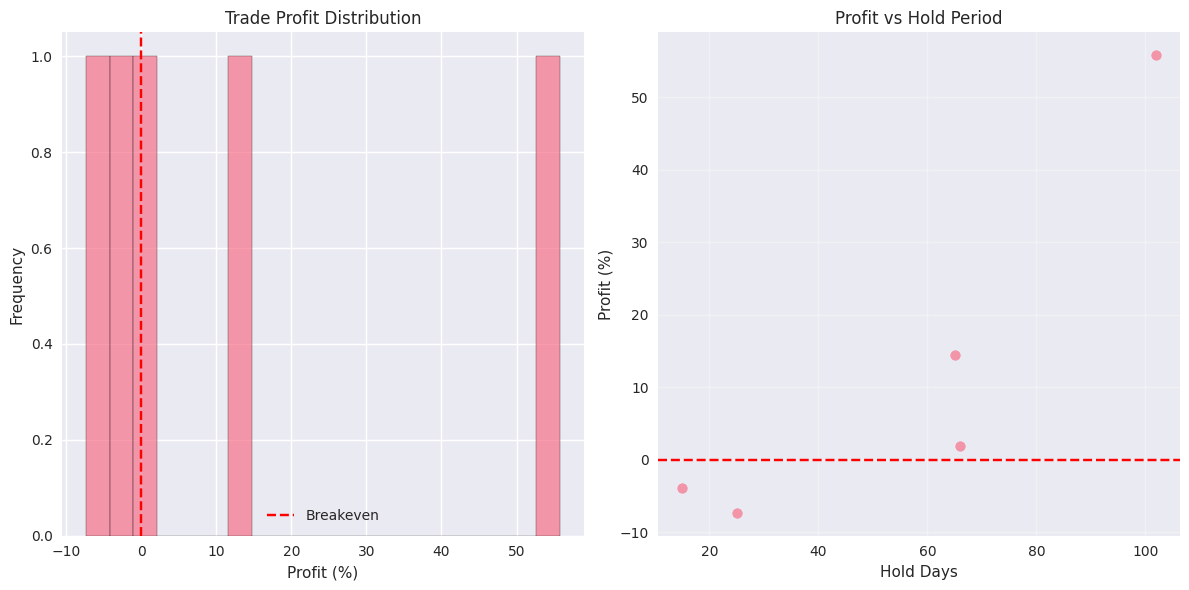

In [13]:
# Analyze trade statistics for the best strategy
best_data = engine.results[best_strategy]['data']

# Identify individual trades
trades = []
position = 0
entry_price = 0
entry_date = None

for i, (date, row) in enumerate(best_data.iterrows()):
    if row['signal'] != position and row['signal'] != 0:
        if position == 0:  # Entry
            position = row['signal']
            entry_price = row['close']
            entry_date = date
        else:  # Exit
            exit_price = row['close']
            exit_date = date
            
            if position == 1:  # Long trade
                profit = exit_price - entry_price
                profit_pct = (profit / entry_price) * 100
            else:  # Short trade
                profit = entry_price - exit_price
                profit_pct = (profit / entry_price) * 100
            
            trades.append({
                'entry_date': entry_date,
                'exit_date': exit_date,
                'entry_price': entry_price,
                'exit_price': exit_price,
                'position': 'Long' if position == 1 else 'Short',
                'profit': profit,
                'profit_pct': profit_pct,
                'hold_days': (exit_date - entry_date).days
            })
            
            position = 0
            entry_price = 0
            entry_date = None

trades_df = pd.DataFrame(trades)

if len(trades_df) > 0:
    print(f"\nTrade Analysis for {best_strategy}:")
    print(f"Total trades: {len(trades_df)}")
    print(f"Winning trades: {len(trades_df[trades_df['profit'] > 0])}")
    print(f"Losing trades: {len(trades_df[trades_df['profit'] <= 0])}")
    print(f"Win rate: {len(trades_df[trades_df['profit'] > 0]) / len(trades_df) * 100:.1f}%")
    print(f"Average profit per trade: {trades_df['profit_pct'].mean():.2f}%")
    print(f"Average hold period: {trades_df['hold_days'].mean():.1f} days")
    print(f"Largest win: {trades_df['profit_pct'].max():.2f}%")
    print(f"Largest loss: {trades_df['profit_pct'].min():.2f}%")
    
    print("\nRecent Trades:")
    display(trades_df.tail(10))
    
    # Plot trade distribution
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.hist(trades_df['profit_pct'], bins=20, alpha=0.7, edgecolor='black')
    plt.axvline(x=0, color='red', linestyle='--', label='Breakeven')
    plt.title('Trade Profit Distribution')
    plt.xlabel('Profit (%)')
    plt.ylabel('Frequency')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.scatter(trades_df['hold_days'], trades_df['profit_pct'], alpha=0.7)
    plt.axhline(y=0, color='red', linestyle='--')
    plt.title('Profit vs Hold Period')
    plt.xlabel('Hold Days')
    plt.ylabel('Profit (%)')
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
else:
    print("No trades completed in the backtest period")

## 11. Pros and Cons

### Advantages:
- ✅ **Simple to Understand**: Easy to calculate and interpret
- ✅ **Trend Identification**: Excellent for identifying market trends
- ✅ **Support/Resistance**: Can act as dynamic support and resistance levels
- ✅ **Noise Reduction**: Smooths out price volatility
- ✅ **Widely Used**: Many traders watch common SMA levels

### Disadvantages:
- ❌ **Lagging Indicator**: Based on past prices, signals are delayed
- ❌ **Whipsaw in Ranging Markets**: Generates false signals in sideways markets
- ❌ **Equal Weighting**: Gives equal importance to all periods in the calculation
- ❌ **Late Signals**: May miss the beginning of trends

### When to Use:
- **Trending Markets**: Strong uptrends or downtrends
- **Medium to Long-term Trading**: Swing trading and position trading
- **Market Analysis**: Part of comprehensive technical analysis
- **Confirmation**: To confirm other indicators or signals

### When to Avoid:
- **Ranging Markets**: Sideways or choppy markets
- **Scalping**: Very short-term trading where lag is problematic
- **Volatile Events**: During news events or high volatility
- **As Standalone**: Should not be used as the only indicator

## 12. Advanced SMA Techniques

### 1. Multiple Time Frame Analysis
Use SMAs on different timeframes to get a broader market perspective:
- **Long-term**: 200-day SMA for overall trend direction
- **Medium-term**: 50-day SMA for intermediate trends
- **Short-term**: 20-day SMA for entry timing

### 2. SMA Envelopes
Create bands around the SMA to identify overbought/oversold conditions:
- Upper Band = SMA × (1 + percentage)
- Lower Band = SMA × (1 - percentage)

### 3. SMA Slope Analysis
Analyze the slope of the SMA to gauge trend strength:
- **Upward Slope**: Strong uptrend
- **Flat Slope**: Ranging market
- **Downward Slope**: Strong downtrend

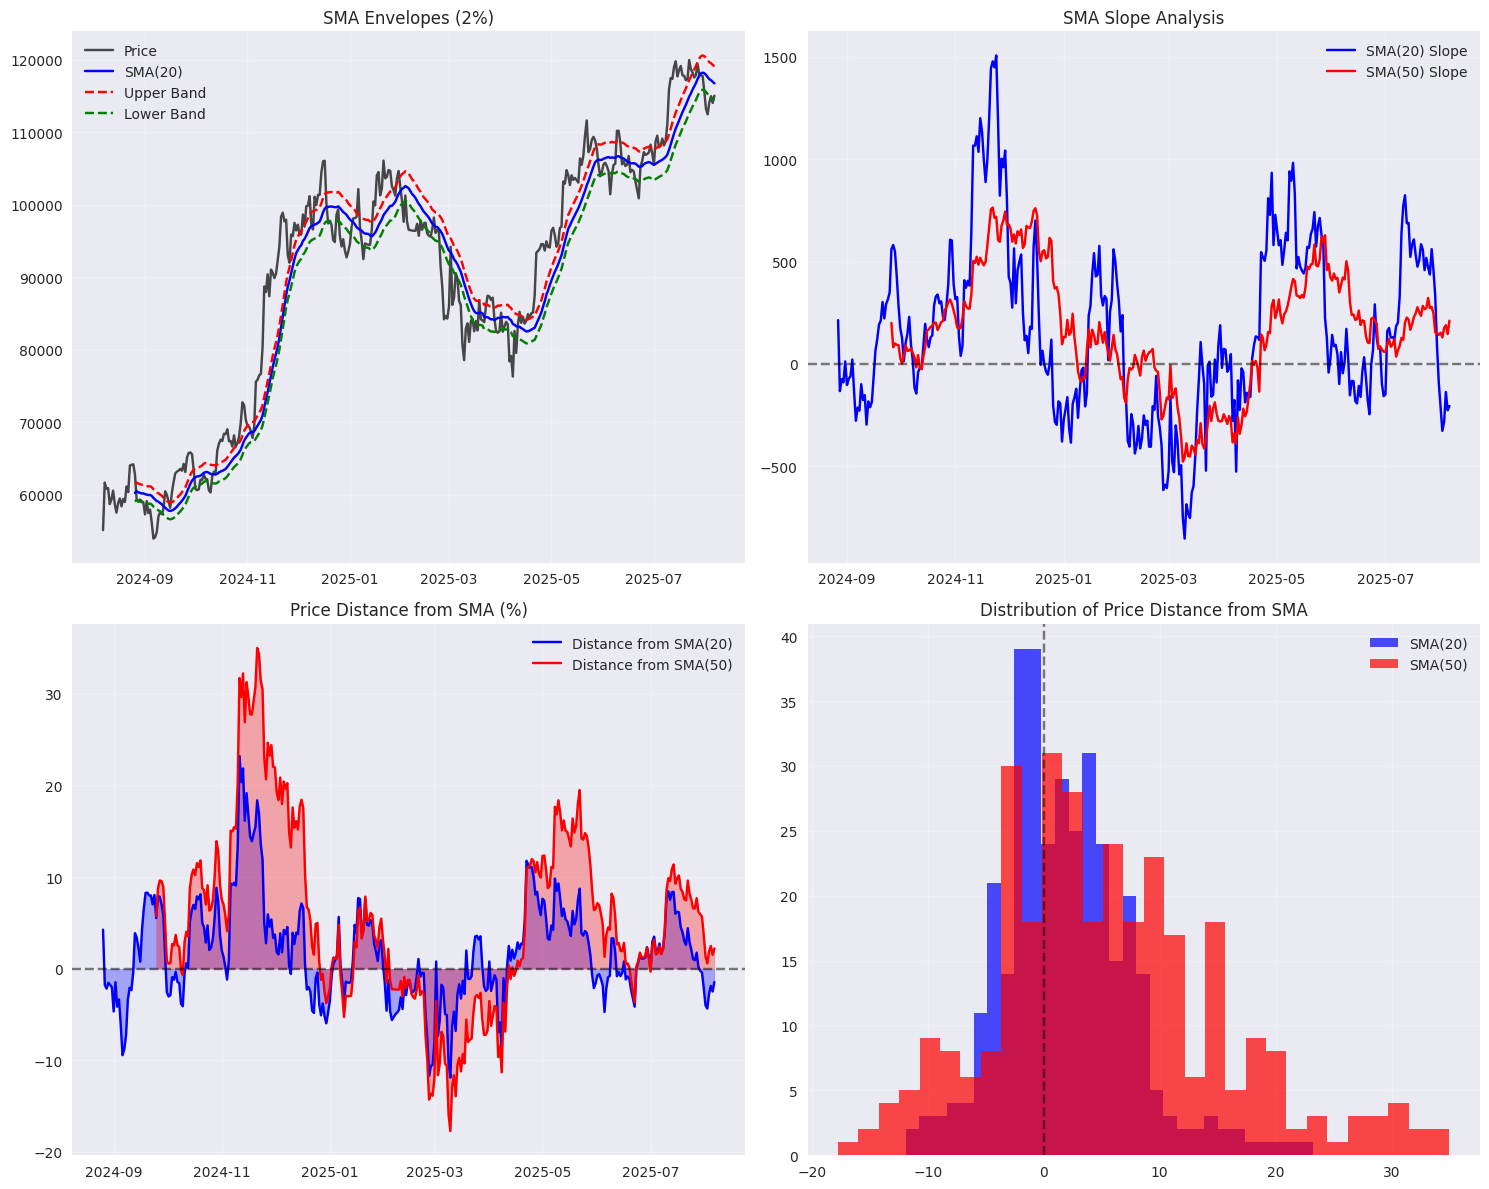

Extreme Price Distance Analysis:
Found 60 instances of extreme price distance from SMA


,close,sma_20,sma_50,price_sma_20_distance,price_sma_50_distance
timestamp,,,,,
2024-11-06,75579.9,69142.535,65693.248,9.310282,15.049723
2024-11-08,76482.2,69921.370,66246.836,9.383154,15.450344
2024-11-09,76675.1,70304.120,66516.824,9.062029,15.271739
2024-11-10,80410.0,70956.180,66858.612,13.323462,20.268725
2024-11-11,88728.9,72022.305,67362.022,23.196418,31.719472


In [14]:
# Advanced SMA Techniques
df_advanced = df_manual.copy()

# 1. SMA Envelopes
envelope_percentage = 0.02  # 2%
df_advanced['sma_20_envelope'] = IndicatorCalculator.sma(df_advanced['close'], 20)
df_advanced['sma_20_upper'] = df_advanced['sma_20_envelope'] * (1 + envelope_percentage)
df_advanced['sma_20_lower'] = df_advanced['sma_20_envelope'] * (1 - envelope_percentage)

# 2. SMA Slope Analysis
df_advanced['sma_20_slope'] = df_advanced['sma_20'].diff()
df_advanced['sma_50_slope'] = df_advanced['sma_50'].diff()

# 3. Price Distance from SMA
df_advanced['price_sma_20_distance'] = ((df_advanced['close'] - df_advanced['sma_20']) / df_advanced['sma_20']) * 100
df_advanced['price_sma_50_distance'] = ((df_advanced['close'] - df_advanced['sma_50']) / df_advanced['sma_50']) * 100

# Plot advanced techniques
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# SMA Envelopes
axes[0, 0].plot(df_advanced.index, df_advanced['close'], label='Price', alpha=0.7, color='black')
axes[0, 0].plot(df_advanced.index, df_advanced['sma_20_envelope'], label='SMA(20)', color='blue')
axes[0, 0].plot(df_advanced.index, df_advanced['sma_20_upper'], label='Upper Band', color='red', linestyle='--')
axes[0, 0].plot(df_advanced.index, df_advanced['sma_20_lower'], label='Lower Band', color='green', linestyle='--')
axes[0, 0].set_title('SMA Envelopes (2%)')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# SMA Slope
axes[0, 1].plot(df_advanced.index, df_advanced['sma_20_slope'], label='SMA(20) Slope', color='blue')
axes[0, 1].plot(df_advanced.index, df_advanced['sma_50_slope'], label='SMA(50) Slope', color='red')
axes[0, 1].axhline(y=0, color='black', linestyle='--', alpha=0.5)
axes[0, 1].set_title('SMA Slope Analysis')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Price Distance from SMA
axes[1, 0].plot(df_advanced.index, df_advanced['price_sma_20_distance'], label='Distance from SMA(20)', color='blue')
axes[1, 0].plot(df_advanced.index, df_advanced['price_sma_50_distance'], label='Distance from SMA(50)', color='red')
axes[1, 0].axhline(y=0, color='black', linestyle='--', alpha=0.5)
axes[1, 0].fill_between(df_advanced.index, df_advanced['price_sma_20_distance'], 0, alpha=0.3, color='blue')
axes[1, 0].fill_between(df_advanced.index, df_advanced['price_sma_50_distance'], 0, alpha=0.3, color='red')
axes[1, 0].set_title('Price Distance from SMA (%)')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Distance Distribution
axes[1, 1].hist(df_advanced['price_sma_20_distance'].dropna(), bins=30, alpha=0.7, label='SMA(20)', color='blue')
axes[1, 1].hist(df_advanced['price_sma_50_distance'].dropna(), bins=30, alpha=0.7, label='SMA(50)', color='red')
axes[1, 1].axvline(x=0, color='black', linestyle='--', alpha=0.5)
axes[1, 1].set_title('Distribution of Price Distance from SMA')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Analysis of extreme distances
print("Extreme Price Distance Analysis:")
extreme_distances = df_advanced[
    (abs(df_advanced['price_sma_20_distance']) > 10) | 
    (abs(df_advanced['price_sma_50_distance']) > 15)
][['close', 'sma_20', 'sma_50', 'price_sma_20_distance', 'price_sma_50_distance']]

if len(extreme_distances) > 0:
    print(f"Found {len(extreme_distances)} instances of extreme price distance from SMA")
    display(extreme_distances.head())
else:
    print("No extreme distances found in the dataset")

## 13. Risk Management with SMA

### 1. Stop Loss Placement
- **Trend Following**: Place stop loss below the SMA in uptrends
- **Mean Reversion**: Place stop loss beyond the SMA envelope
- **Volatility Adjusted**: Use ATR to adjust stop loss distance from SMA

### 2. Position Sizing
- **Slope-based**: Increase position size when SMA slope is steep
- **Distance-based**: Reduce position size when price is far from SMA
- **Multiple SMAs**: Use alignment of multiple SMAs to determine position size

In [ ]:
# Risk Management with SMA
df_risk = df_manual.copy()

# Calculate ATR for volatility-based stops
df_risk['atr'] = IndicatorCalculator.atr(df_risk['high'], df_risk['low'], df_risk['close'], 14)

# Risk management techniques
df_risk['sma_20'] = IndicatorCalculator.sma(df_risk['close'], 20)

# 1. Stop loss based on SMA distance
stop_loss_multiplier = 1.5
df_risk['stop_loss_long'] = df_risk['sma_20'] - (stop_loss_multiplier * df_risk['atr'])
df_risk['stop_loss_short'] = df_risk['sma_20'] + (stop_loss_multiplier * df_risk['atr'])

# 2. Position sizing based on SMA slope
df_risk['sma_20_slope'] = df_risk['sma_20'].diff()
df_risk['position_size'] = np.where(
    df_risk['sma_20_slope'] > df_risk['sma_20_slope'].quantile(0.7), 1.0,  # Large position
    np.where(
        df_risk['sma_20_slope'] > df_risk['sma_20_slope'].quantile(0.3), 0.5,  # Medium position
        0.25  # Small position
    )
)

# 3. Risk-reward ratio based on SMA distance
df_risk['price_sma_distance'] = abs(df_risk['close'] - df_risk['sma_20'])
df_risk['risk_per_unit'] = df_risk['atr'] * stop_loss_multiplier
df_risk['reward_per_unit'] = df_risk['price_sma_distance'] * 2  # 2:1 reward-risk ratio
df_risk['risk_reward_ratio'] = df_risk['reward_per_unit'] / df_risk['risk_per_unit']

# Plot risk management
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Stop loss levels
axes[0, 0].plot(df_risk.index, df_risk['close'], label='Price', alpha=0.7, color='black')
axes[0, 0].plot(df_risk.index, df_risk['sma_20'], label='SMA(20)', color='blue')
axes[0, 0].plot(df_risk.index, df_risk['stop_loss_long'], label='Stop Loss (Long)', color='red', linestyle='--')
axes[0, 0].plot(df_risk.index, df_risk['stop_loss_short'], label='Stop Loss (Short)', color='green', linestyle='--')
axes[0, 0].set_title('Stop Loss Levels Based on SMA + ATR')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Position sizing
axes[0, 1].plot(df_risk.index, df_risk['position_size'], label='Position Size', color='purple', linewidth=2)
axes[0, 1].fill_between(df_risk.index, df_risk['position_size'], alpha=0.3, color='purple')
axes[0, 1].set_title('Position Sizing Based on SMA Slope')
axes[0, 1].set_ylabel('Position Size (Multiplier)')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Risk-reward ratio
axes[1, 0].plot(df_risk.index, df_risk['risk_reward_ratio'], label='Risk-Reward Ratio', color='orange')
axes[1, 0].axhline(y=2, color='red', linestyle='--', label='Minimum 2:1 Ratio')
axes[1, 0].fill_between(df_risk.index, df_risk['risk_reward_ratio'], 2, alpha=0.3, color='orange')
axes[1, 0].set_title('Risk-Reward Ratio Analysis')
axes[1, 0].set_ylabel('Ratio')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# SMA slope distribution
axes[1, 1].hist(df_risk['sma_20_slope'].dropna(), bins=30, alpha=0.7, color='blue', edgecolor='black')
axes[1, 1].axvline(x=df_risk['sma_20_slope'].quantile(0.3), color='red', linestyle='--', label='30th percentile')
axes[1, 1].axvline(x=df_risk['sma_20_slope'].quantile(0.7), color='green', linestyle='--', label='70th percentile')
axes[1, 1].set_title('SMA Slope Distribution')
axes[1, 1].set_xlabel('SMA Slope')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Risk management statistics
print("Risk Management Statistics:")
print(f"Average position size: {df_risk['position_size'].mean():.2f}")
print(f"Average risk-reward ratio: {df_risk['risk_reward_ratio'].mean():.2f}")
print(f"Trades with minimum 2:1 ratio: {(df_risk['risk_reward_ratio'] >= 2).sum()} ({(df_risk['risk_reward_ratio'] >= 2).mean()*100:.1f}%)")
print(f"Average stop loss distance: {df_risk['risk_per_unit'].mean():.2f}")

## 14. Conclusion

The Simple Moving Average (SMA) is a fundamental technical analysis tool that every trader should understand. While it has limitations, particularly in ranging markets, it remains one of the most reliable indicators for trend identification and confirmation.

### Key Takeaways:
1. **Trend Identification**: SMAs excel at identifying market direction
2. **Signal Generation**: Crossovers provide clear entry/exit signals
3. **Support/Resistance**: SMAs act as dynamic support and resistance levels
4. **Risk Management**: SMAs can be used for stop loss placement and position sizing
5. **Combination**: Works best when combined with other indicators

### Best Practices:
- Use multiple SMAs of different periods for confirmation
- Combine with momentum indicators like RSI or MACD
- Implement proper risk management techniques
- Consider market conditions when using SMA strategies
- Test different periods to find what works best for your trading style

## 15. Exercises

### Exercise 1: Optimize SMA Periods
Test different SMA periods to find the optimal combination for crossover strategies. Create a function that tests multiple period combinations and returns the best performing one based on Sharpe ratio.

### Exercise 2: Create SMA Strategy with Volume Confirmation
Modify the SMA crossover strategy to include volume confirmation. Only enter trades when volume is above the 20-day average.

### Exercise 3: Implement Walk-Forward Testing
Create a walk-forward testing system where you optimize SMA parameters on a training period and test them on an out-of-sample period.

### Solutions:
```python
# Exercise 1 Solution
def optimize_sma_periods(data, short_range, long_range):
    best_sharpe = -float('inf')
    best_params = None
    
    for short in short_range:
        for long in long_range:
            if short >= long:
                continue
            
            signals = sma_crossover_strategy(data, short, long)[['signal']]
            engine = BacktestEngine()
            result = engine.run_backtest(data, signals, f"SMA_{short}_{long}")
            sharpe = result['metrics']['sharpe_ratio']
            
            if sharpe > best_sharpe:
                best_sharpe = sharpe
                best_params = (short, long)
    
    return best_params, best_sharpe

# Exercise 2 Solution
def sma_crossover_with_volume(data, short_period=20, long_period=50, volume_period=20):
    df = data.copy()
    
    # Calculate SMAs
    df['sma_short'] = IndicatorCalculator.sma(df['close'], short_period)
    df['sma_long'] = IndicatorCalculator.sma(df['close'], long_period)
    df['volume_sma'] = IndicatorCalculator.sma(df['volume'], volume_period)
    
    # Generate signals with volume confirmation
    df['signal'] = 0
    
    # Buy signal: SMA crossover AND high volume
    buy_condition = ((df['sma_short'] > df['sma_long']) & 
                    (df['sma_short'].shift(1) <= df['sma_long'].shift(1)) &
                    (df['volume'] > df['volume_sma']))
    
    # Sell signal: SMA crossunder AND high volume
    sell_condition = ((df['sma_short'] < df['sma_long']) & 
                      (df['sma_short'].shift(1) >= df['sma_long'].shift(1)) &
                      (df['volume'] > df['volume_sma']))
    
    df.loc[buy_condition, 'signal'] = 1
    df.loc[sell_condition, 'signal'] = -1
    
    return df
```

## 16. Additional Resources

- **Books**:
  - "Technical Analysis of Financial Markets" by John J. Murphy
  - "Trading Systems and Methods" by Perry J. Kaufman
  - "Come Into My Trading Room" by Dr. Alexander Elder

- **Online Resources**:
  - [TradingView Documentation](https://www.tradingview.com/pine-script-docs/)
  - [Investopedia - Moving Averages](https://www.investopedia.com/terms/m/movingaverage.asp)
  - [Binance Academy - Technical Analysis](https://academy.binance.com/en/categories/technical-analysis)

- **Research Papers**:
  - "The Profitability of Moving Average Trading Rules" by Brock, Lakonishok, and LeBaron
  - "Technical Analysis and Moving Averages" by Lo, Mamaysky, and Wang

- **Tools**:
  - [TradingView](https://www.tradingview.com/) - Charting and Pine Script
  - [Binance](https://www.binance.com/) - Trading and indicators
  - [Freqtrade](https://www.freqtrade.io/) - Algorithmic trading

---

**Disclaimer**: This tutorial is for educational purposes only. Trading cryptocurrencies involves significant risk. Always do your own research and consider consulting with a financial advisor before making investment decisions.